# Task 2
## Question

Implement a circuit that returns |01⟩
and |10⟩

with equal probability.

Requirements :

-The circuit should consist only of CNOTs, RXs and RYs.

-Start from all parameters in parametric gates being equal to 0 or randomly chosen.

-You should find the right set of parameters using gradient descent (you might use more advanced optimization methods if you like).

-Simulations must be done with sampling - i.e. a limited number of measurements per iteration and noise.

Compare the results for different numbers of measurements: 1, 10, 100, 1000.
## Bonus Question:

How to make sure you produce state |01⟩
+ |10⟩ and not |01⟩ - |10⟩ ?

## Solution

#### 1. Import the required libraries

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from qiskit import IBMQ
from qiskit.providers.aer.noise.device import basic_device_noise_model

#### 2. Use the IBMQ Device and noisy model

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
ibmq_16_melbourne = provider.get_backend('ibmq_16_melbourne')
device_properties = ibmq_16_melbourne.properties()

noise_model = basic_device_noise_model(device_properties)

/usr/local/lib/python3.8/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
/usr/local/lib/python3.8/dist-packages/qiskit/providers/aer/noise/device/basic_device_model.py:111: DeprecationWarning: This function is been deprecated and moved to a method of the`NoiseModel` class. For equivalent functionality use `NoiseModel.from_backend(properties, **kwargs).
  warnings.warn(


#### 3. Create a device and circuit required gates

In [3]:
dev = qml.device('qiskit.aer', wires=2, noise_model=noise_model, shots = 1000, analytic=False)

In [4]:
@qml.qnode(dev)
def custom():
    
    qml.Hadamard(wires=0)
    
    qml.PauliX(wires=1)
    
    qml.CNOT(wires=[0, 1])
    
    #Return probablity of states for '00', '01', '10', '11'
    return qml.probs(wires=[0,1]) 

custom()

array([0.067, 0.478, 0.443, 0.012])

#### 4. Create the parametierized circuit

In [5]:
def circuit(param):
    qml.RY(param[0], wires=0)
    
    qml.RY(param[1], wires=1)
    
    qml.CNOT(wires=[0, 1])

#### 5. Initialize the circuit

In [6]:
dev1 = qml.device("qiskit.aer", wires=2, shots=1000, noise_model = noise_model, analytic=False)

@qml.qnode(dev1)
def bell_state(param):
    
    circuit(param)
    
    return qml.probs(wires=[0,1])


#### 6. Create the cost function

In [7]:
def cost(x):           #define cost function for noisy simulation
    prob_00, prob_01, prob_10, prob_11 = bell_state(x)
    return ((prob_00-0)**2 + (prob_01-0.5)**2 + (prob_10-0.5)**2 + (prob_11-0)**2)

#### 7. Find the parameters by the Gradient Descent Optimizer and minimize the cost.

In [10]:
prob = []
all_costs = []

for num_shots in [1, 10, 100, 1000]:
    dev.shots = num_shots
    initial_params = np.random.randn(2) #initialize with random parameters
    
    steps = 100 # Number of steps of optimization
    
    params = initial_params.copy()
    
    optimizer = qml.GradientDescentOptimizer(stepsize=0.6) #Using PennyLane's Gradient Descent Optimizer
    
    costs = []
    
    print('--------------------------------\n')
    print('For {0} shots\n'.format(num_shots))
    for i in range(steps):
        costs.append(cost(params))
        params = optimizer.step(cost, params)
        
        if (i%10 == 0):
            print('The cost of {0} measurement sampling is {1}\n'.format(num_shots, cost(params)))
            print('The parameters are {0}\n'.format(params))
    all_costs.append(costs)

    p = [0, 0, 0, 0]
    p[0], p[1], p[2], p[3] = bell_state(params)
    print('Final probability of states is as follows: \n')
    print('\n Probability of 00 is: {0}'.format(p[0]))
    print('\n Probability of 01 is: {0}'.format(p[1])) 
    print('\n Probability of 10 is: {0}'.format(p[2]))
    print('\n Probability of 11 is: {0}'.format(p[3]))
    prob.append(p)

--------------------------------

For 1 shots

The cost of 1 measurement sampling is 0.8368420000000001

The parameters are [-1.12744038 -0.64321251]

The cost of 1 measurement sampling is 0.030953999999999992

The parameters are [-1.60737858 -2.48494431]

The cost of 1 measurement sampling is 0.012254

The parameters are [-1.58087118 -2.81315931]

The cost of 1 measurement sampling is 0.012577999999999999

The parameters are [-1.58344518 -2.94103731]

The cost of 1 measurement sampling is 0.010945999999999997

The parameters are [-1.58656818 -3.01380771]

The cost of 1 measurement sampling is 0.011701999999999997

The parameters are [-1.56286098 -3.05971611]

The cost of 1 measurement sampling is 0.009774000000000001

The parameters are [-1.58682438 -3.08962011]

The cost of 1 measurement sampling is 0.008360000000000001

The parameters are [-1.57730118 -3.10905891]

The cost of 1 measurement sampling is 0.013942

The parameters are [-1.59318378 -3.12400971]

The cost of 1 measurement

In [11]:
print('Final parameters are {0} for first and second qubit for noisy simulations.'.format(params))

Final parameters are [1.59187587 3.13249064] for first and second qubit for noisy simulations.


#### 8. Ploting the Probability Distribution

<BarContainer object of 4 artists>

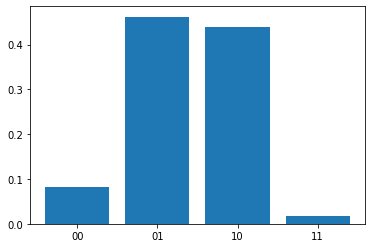

In [12]:
plt.bar(['00','01','10', '11'], prob[0]) #Probability Distribution for shots 1

<BarContainer object of 4 artists>

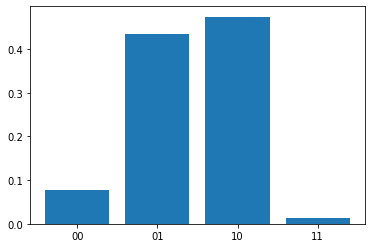

In [13]:
plt.bar(['00','01','10', '11'], prob[1]) #Probability Distribution for shots 10

<BarContainer object of 4 artists>

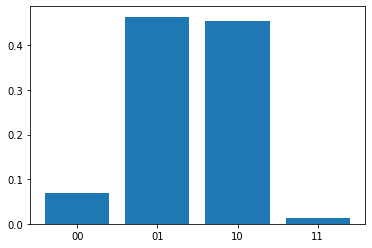

In [14]:
plt.bar(['00','01','10', '11'], prob[2])  #Probability Distribution for shots 100

<BarContainer object of 4 artists>

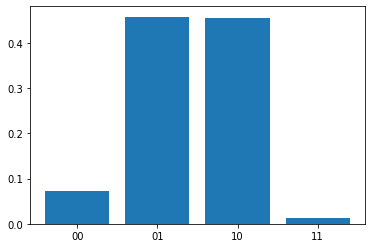

In [15]:
plt.bar(['00','01','10', '11'], prob[3])   #Probability Distribution for shots 1000

#### 9. Evaluating Cost

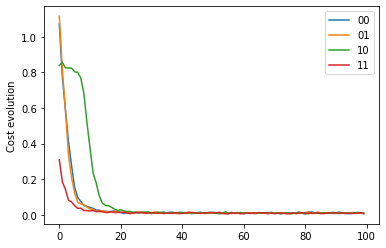

In [16]:
plt.plot(all_costs[0], label ="00")
plt.plot(all_costs[1], label ="01")
plt.plot(all_costs[2], label ="10")
plt.plot(all_costs[3], label ="11")
plt.ylabel('Cost evolution')
plt.legend()
plt.show()

## 10. Conclusion

#### The cost reduces significantly with the increase in shots, and we also get a precise probability value.

----------------------------------------------------------------------------------------------------------------------------

## Bonus Question

How do we prepare |01⟩+|10⟩ and not |01⟩−|10⟩?

## Solution

#### 1. First we define the same circuit but find the expectation value of X⊗X operator. The value |01⟩+|10⟩ is +1 and |01⟩−|10⟩ is -1

In [18]:
dev2 = qml.device('qiskit.aer', wires=2, noise_model=noise_model, shots = 1000, analytic=False)
@qml.qnode(dev2)
def circ_plus():
    
    qml.Hadamard(wires=0)

    qml.PauliX(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliX(0)@(qml.PauliX(1)))
circ_plus()

0.854

In [19]:
dev2 = qml.device('qiskit.aer', wires=2, noise_model=noise_model, shots = 1000, analytic=False)
@qml.qnode(dev2)
def circ_minus():
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)

    qml.PauliX(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliX(0)@(qml.PauliX(1)))
circ_minus()

-0.832

#### 2. Initialize the circuit with parameter values 𝜋/2 and 𝜋 for RY

In [20]:
dev3 = qml.device('qiskit.aer', wires=2, noise_model=noise_model, shots = 1000, analytic=False)
@qml.qnode(dev3)
def circ(param):
    qml.RY(param[0], wires=0)
    
    qml.RY(param[0]*2, wires=1)
    
    qml.CNOT(wires=[0, 1])
    
    return qml.expval(qml.PauliX(0) @ qml.PauliX(1))

#### 3. Create the cost function

In [21]:
def cost(X):
    val = circ(X)
    return -1*val

#### 4. Find the parameters by the Gradient Descent Optimizer and minimize the cost.

In [23]:
num_shots = 1000
dev3.shots = num_shots
initial_param = np.random.randn(1) #starting with random parameters
    
steps = 100 # Number of steps of optimization
    
param = initial_param.copy()
    
optimizer = qml.GradientDescentOptimizer(stepsize=0.6) #Using PennyLane's Gradient Descent Optimizer
    
costs = []
    
for i in range(steps):
    costs.append(cost(param))
    parameters = optimizer.step(cost, param)

print('\nThe final parameters for {0} measurement sampling is: {1}'.format(num_shots, param))
val = circ(param)
print('The expectation value is: {0}'.format(val))


The final parameters for 1000 measurement sampling is: [0.35340131]
The expectation value is: 0.338


#### Thank yout the interesting task. 
#### With kind regards,
#### Nisheeth Joshi